# Environment topology visualization

In [3]:
import numpy as np
import scipy.io
from scipy.ndimage import gaussian_filter1d
import ot
import ot.plot
from pathlib import Path
#import functions as fs
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
# %% PARAMETERS
animal = 3
session = '1Square'

In [41]:
ratemaps = np.load(f'../processed_data/ratemaps/ratemaps_animal{animal}_{session}.npy')

ot_dists = np.load(f'../processed_data/ratemap_distances/ot_distances_animal{animal}_{session}.npy')
corr_dists = np.load(f'../processed_data/ratemap_distances/corr_distances_animal{animal}_{session}.npy')
peak_dists =np.load(f'../processed_data/ratemap_distances/peak_distances_animal{animal}_{session}.npy')

cell_properties  = pd.read_csv(f'../processed_data/cell_properties/cell_properties_animal{animal}.csv',index_col=0)
cell_properties.head()

,avg_rate_1Square,rate_include_1Square,spatial_info_1Square,place_cell_flag_1Square,avg_rate_2Circle,rate_include_2Circle,spatial_info_2Circle,place_cell_flag_2Circle
0,1.156927,1,0.596605,True,1.144281,1,0.602714,False
1,0.393964,1,0.451715,False,0.406856,1,2.154059,True
2,2.795973,1,0.677168,True,2.244063,1,0.845969,False
3,0.982959,1,0.150975,False,0.755226,1,0.967175,False
4,0.950194,1,0.310589,False,0.340742,1,1.253781,False


# Clustering

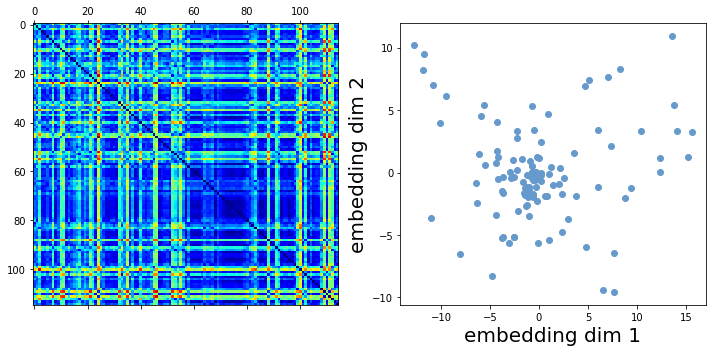

In [55]:
X = ot_dists
n_cells = X.shape[0]
plot_names = False

names = np.arange(1,n_cells+1)


#embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
embedding = Isomap(n_components=2,metric='precomputed')

X_mds = embedding.fit_transform(X)


figure(figsize=(10,5))

ax = subplot(1,2,1)
ax.matshow(X,aspect='auto',cmap=cm.jet)

subplot(1,2,2)
xlabel('embedding dim 1',fontsize=20)
ylabel('embedding dim 2',fontsize=20)

scatter(X_mds[:,0],X_mds[:,1],c='#6699CC')

savefig('../imgs/mds_base.svg')

tight_layout()

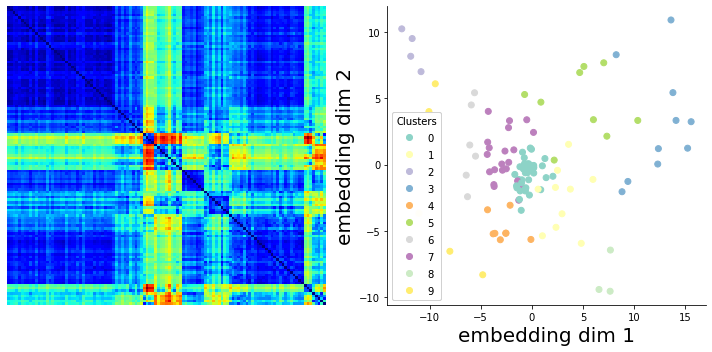

In [45]:
# fit with 6 clusters:
n_clusters = 10
plot_names = False
names = np.arange(1,n_cells+1)

kmeans = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
labels = kmeans.fit_predict(X)

ix = np.argsort(labels)
ordered_X = X[ix]
ordered_X = ordered_X[:,ix]


#embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
embedding = Isomap(n_components=2,metric='precomputed')

X_mds = embedding.fit_transform(X)


figure(figsize=(10,5))

ax = subplot(1,2,1)
ax.matshow(ordered_X,aspect='auto',cmap=cm.jet)

ax.axis('off')

ax = subplot(1,2,2)
ax.set_xlabel('embedding dim 1',fontsize=20)
ax.set_ylabel('embedding dim 2',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

scatterp = ax.scatter(X_mds[:,0],X_mds[:,1],c=labels,cmap=cm.Set3,label=labels)
legend1 = ax.legend(*scatterp.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
savefig('../imgs/clustering_example.svg')


tight_layout()

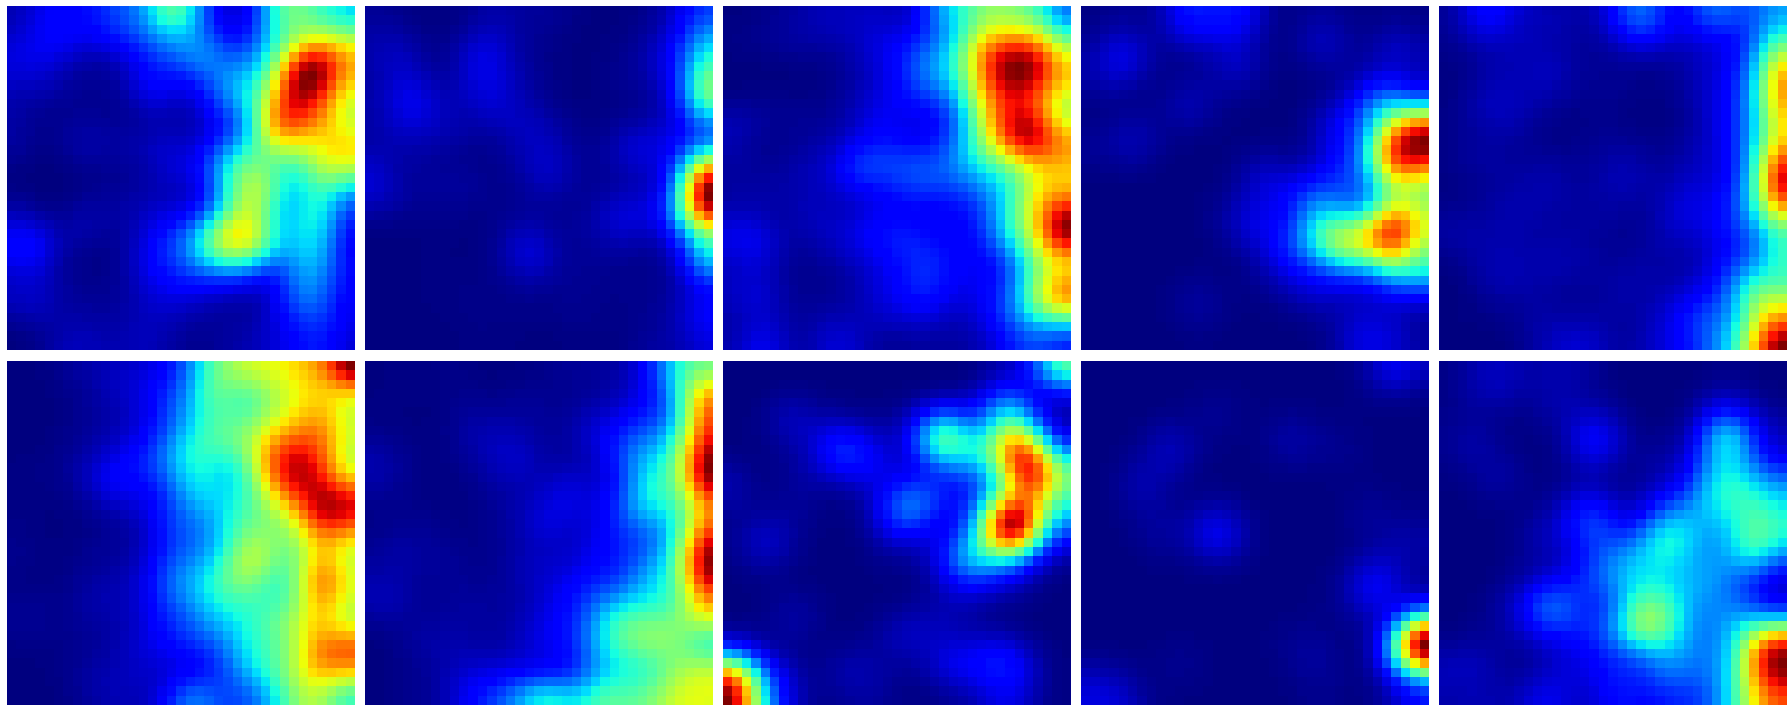

In [50]:
from scipy.ndimage import gaussian_filter 

cluster_id = 3
sigma = 2

cluster_idxs = np.where(labels==cluster_id)[0]

tot = len(cluster_idxs)
n_cols = 5
n_rows = tot // n_cols 
n_rows += tot % n_cols

fig= plt.figure(figsize=(n_cols*5,n_rows*5))
for i,idx in enumerate(cluster_idxs):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    ratemap1 = ratemaps[idx]
    ratemap1 = gaussian_filter(ratemap1,sigma)
    ax.matshow(ratemap1,aspect='auto',cmap=cm.jet)
    ax.axis('off')

#savefig('../imgs/top_right.svg')
    

tight_layout()

In [49]:
len(cluster_idxs)

13

# 3D plot with spatial info

In [17]:
import plotly.express as px

X = ot_dists
point_size = 1
n_cells = X.shape[0]




plot_names = True
names = np.arange(1,n_cells+1)


#embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
embedding = Isomap(n_components=2,metric='precomputed')

X_mds = embedding.fit_transform(X)

df = cell_properties
df['MDS1'] = X_mds[:,0]
df['MDS2'] = X_mds[:,1]
df['size'] = [point_size for i in range(len(df))]

fig = px.scatter_3d(df, x='MDS1', y='MDS2', z=f'spatial_info_{session}')

fig.show()

In [27]:
import plotly.express as px

X = corr_dists
point_size = 1
n_cells = X.shape[0]




plot_names = True
names = np.arange(1,n_cells+1)


embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
X_mds = embedding.fit_transform(X)

df = cell_properties
df['MDS1'] = X_mds[:,0]
df['MDS2'] = X_mds[:,1]
df['size'] = [point_size for i in range(len(df))]

fig = px.scatter_3d(df, x='MDS1', y='MDS2', z=f'spatial_info_{session}')

fig.show()

In [28]:
import plotly.express as px

X = peak_dists
point_size = 1
n_cells = X.shape[0]




plot_names = True
names = np.arange(1,n_cells+1)


embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
X_mds = embedding.fit_transform(X)

df = cell_properties
df['MDS1'] = X_mds[:,0]
df['MDS2'] = X_mds[:,1]
df['size'] = [point_size for i in range(len(df))]

fig = px.scatter_3d(df, x='MDS1', y='MDS2', z=f'spatial_info_{session}')

fig.show()